In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, MaxNLocator


plt.style.use('estilo_enerdata.mplstyle')


# colores
azulier     = "#1A3D6F"
doradoier  = '#C65C25' 

In [ ]:
f     = '../../data/001_mujeres/API_SP.POP.TOTL.FE.ZS_DS2_es_excel_v2_6003288.xls'
data  = pd.read_excel(f,sheet_name='Data',skiprows=3)
lista = ['WLD','MEX','USA','LCN']

data = data[data['Country Code'].isin(lista)]
data =  data.drop(columns=['Country Code','Indicator Name','Indicator Code'])

# Utilizar melt() para transformar el DataFrame
mundo = data.melt(id_vars=['Country Name'], var_name='Year', value_name='Mujeres')

# Ahora pivotando para que 'Country Name' sea la columna y 'Year' sea el índice
mundo = mundo.pivot(index='Year',columns='Country Name',values='Mujeres')
mundo.index = mundo.index.astype(int)



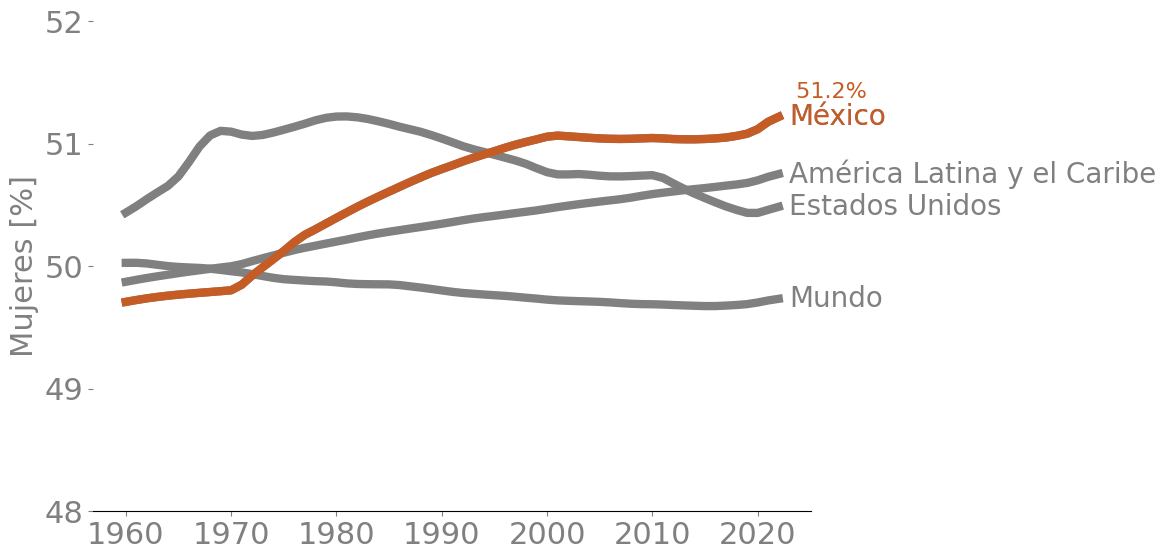

In [ ]:
#| label: fig-mujeres-mundo
#| fig-cap: 


paises = mundo.columns
fig, ax = plt.subplots()

for pais in paises:
    ax.plot(mundo[pais])
    ax.text(mundo[pais].index[-1] + 1,mundo[pais].iloc[-1], pais, ha='left', va='center')

    
ax.plot(mundo['México'],color=doradoier)

ax.text(mundo['México'].index[-1] + 1,mundo['México'].iloc[-1], 
        'México', 
        ha='left', 
        va='center',
        color=doradoier)
ax.text(mundo['México'].index[-1] + 1,mundo['México'].iloc[-1]+.2, 
        str(mundo['México'].iloc[-1].round(1)).join(" %"), 
        ha='left', 
        va='center',
        color=doradoier,fontsize=16)

    
ax.set_ylim(48,52)


ax.set_ylabel('Mujeres [%]')
ax.xaxis.set_major_locator( MultipleLocator(10))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
fig.savefig('images/mujeres.png')

In [ ]:
f = '../../data/001_mujeres/c03 pobesc total.xls'
data = pd.read_excel(f,skiprows=5,nrows=2)
# print(data)
# Derretir el DataFrame para tener los años como filas
data_melted = data.melt(id_vars=['Unnamed: 0'], var_name='Year', value_name='Value')

# Pivotear para obtener el porcentaje de mujeres como columnas
unam = data_melted.pivot(index='Year', columns='Unnamed: 0', values='Value')

# Limpiar los nombres de las figuras para que solo muestren el último año (últimos 4 caracteres)
unam = unam.rename(index=lambda x: x.split('-')[-1])
del unam['Población escolar total']
unam.index = unam.index.astype(int)
unam = unam*100
unam['% mujeres']

Year
2000    49.891077
2001    50.335280
2002    50.614575
2003    50.941182
2004    51.442542
2005    51.468533
2006    51.242303
2007    51.300000
2008    51.300000
2009    51.400000
2010    51.400000
2011    51.400000
2012    51.100000
2013    51.100000
2014    51.100000
2015    51.100000
2016    50.850000
2017    50.901616
2018    51.110000
2019    51.110000
2020    51.500000
2021    51.480000
2022    51.480000
2023    51.480000
Name: % mujeres, dtype: float64

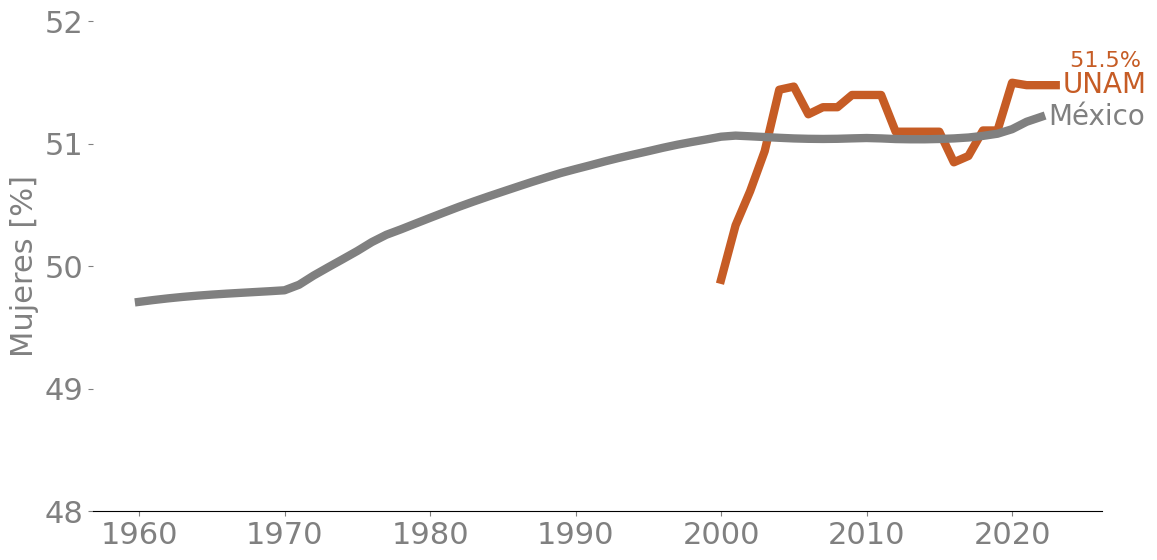

In [ ]:
#| label: fig-unam
#| fig-cap: 


fig, ax = plt.subplots()

ax.plot(unam,color=doradoier)
ax.text(unam.index[-1] + .5 ,unam['% mujeres'].iloc[-1], 'UNAM', ha='left', va='center',color=doradoier)
ax.text(unam.index[-1] + .5 ,unam['% mujeres'].iloc[-1]+.2,
        str(unam['% mujeres'].iloc[-1].round(1)).join(" %"), 
        ha='left', 
        va='center',color=doradoier,
        fontsize=16)


ax.plot(mundo['México'])
ax.text(mundo.index[-1] + .5 ,mundo['México'].iloc[-1], 
        'México', ha='left', va='center')
    
    
ax.set_ylim(48,52)



ax.set_ylabel('Mujeres [%]')
ax.xaxis.set_major_locator( MultipleLocator(10))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()
fig.savefig('images/unam.png')

In [ ]:
f = '../../data/001_mujeres/c16 persaca.xls'
data = pd.read_excel(f, skiprows=5,nrows=2)

data_melted = data.melt(id_vars=['Unnamed: 0'], var_name='Year', value_name='Porcentaje')
acad = data_melted.pivot(index='Year', columns='Unnamed: 0', values='Porcentaje')
del acad["Personas"]
acad.index = acad.index.astype(int)
acad = acad*100
# acad

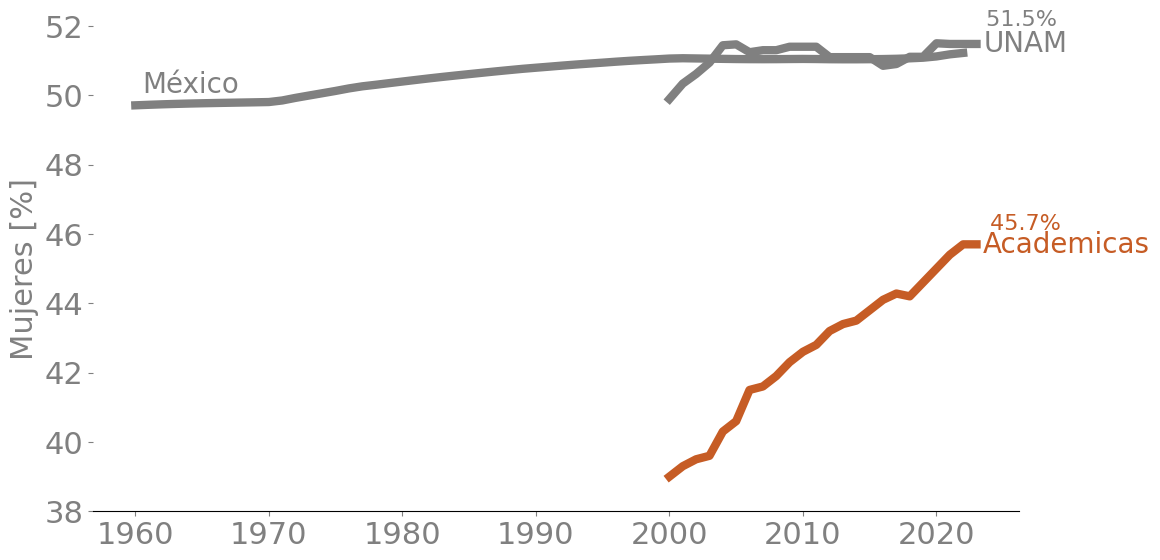

In [ ]:

fig, ax = plt.subplots()

ax.plot(unam)
ax.text(unam.index[-1] + .5 ,unam['% mujeres'].iloc[-1], 
        'UNAM', ha='left', va='center')
ax.text(unam.index[-1] + .2 ,unam['% mujeres'].iloc[-1]+.7,
        str(unam['% mujeres'].iloc[-1].round(1)).join(" %"), 
        ha='left', va='center',fontsize=16)


ax.plot(mundo['México'])
ax.text(mundo.index[0] +  .5,mundo['México'].iloc[0] + .6, 'México', ha='left', va='center')
    
ax.plot(acad,color=doradoier)
ax.text(acad.index[-1] + .5 ,acad['% mujeres '].iloc[-1],
        'Academicas', 
        ha='left', 
        va='center',
        color=doradoier)
ax.text(acad.index[-1] + .5 ,acad['% mujeres '].iloc[-1]+.6,
        str(acad['% mujeres '].iloc[-1].round(1)).join(" %"), 
        ha='left', 
        va='center',
        color=doradoier,fontsize=16)

    
ax.set_ylim(38,52)



ax.set_ylabel('Mujeres [%]')
ax.xaxis.set_major_locator( MultipleLocator(10))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()

fig.savefig('images/acad.png')

In [ ]:
f = '../../data/001_mujeres/c25 sni.xls'
data = pd.read_excel(f, skiprows=5,nrows=2)

data_melted = data.melt(id_vars=['Unnamed: 0'], var_name='Year', value_name='Porcentaje')
sniunam = data_melted.pivot(index='Year', columns='Unnamed: 0', values='Porcentaje')
del sniunam["Total de investigadores en el SNI"]
sniunam.index = sniunam.index.astype(int)
sniunam = sniunam*100
# sni

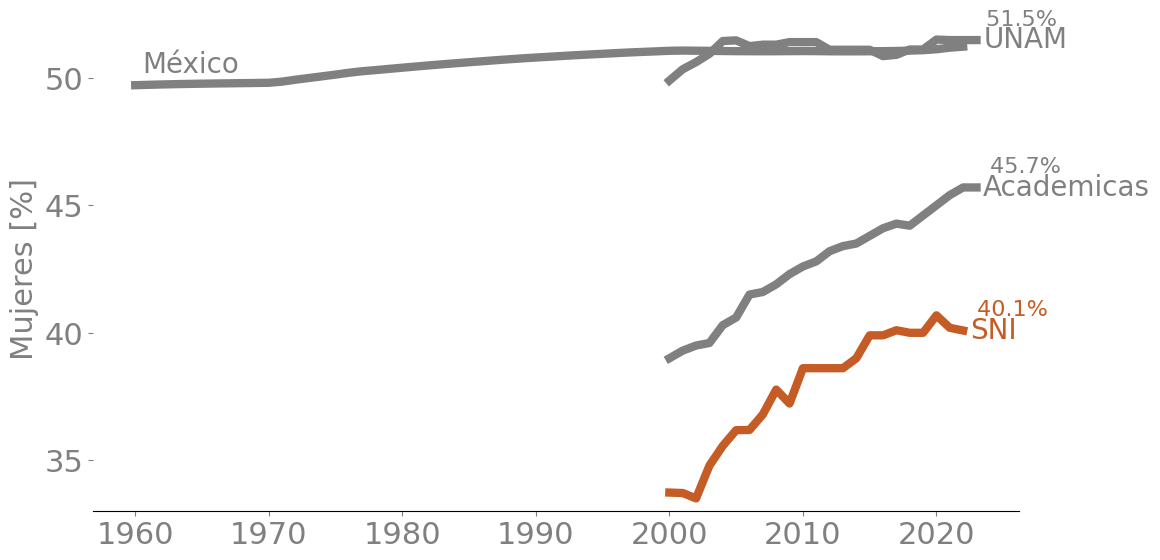

In [ ]:

fig, ax = plt.subplots()

ax.plot(unam)
ax.text(unam.index[-1] + .5 ,unam['% mujeres'].iloc[-1], 
        'UNAM', ha='left', va='center')
ax.text(unam.index[-1] + .2 ,unam['% mujeres'].iloc[-1]+.8,
        str(unam['% mujeres'].iloc[-1].round(1)).join(" %"), 
        ha='left', 
        va='center',
        fontsize=16)


ax.plot(mundo['México'])
ax.text(mundo.index[0] +  .5,mundo['México'].iloc[0] + .8, 
        'México', ha='left', va='center')
    
    
ax.plot(acad)
ax.text(acad.index[-1] + .5 ,acad['% mujeres '].iloc[-1],
        'Academicas', 
        ha='left', 
        va='center')
ax.text(acad.index[-1] + .5 ,acad['% mujeres '].iloc[-1]+.8,
        str(acad['% mujeres '].iloc[-1].round(1)).join(" %"), 
        ha='left', 
        va='center',
        fontsize=16)


ax.plot(sniunam,color=doradoier)
ax.text(sniunam.index[-1] + .5 ,sniunam['% mujeres'].iloc[-1],
        'SNI', 
        ha='left', 
        va='center',
        color=doradoier)
ax.text(sniunam.index[-1] + .5 ,sniunam['% mujeres'].iloc[-1]+.8,
        str(sniunam['% mujeres'].iloc[-1].round(1)).join(" %"), 
        ha='left', 
        va='center',
        color=doradoier,fontsize=16)

    
ax.set_ylim(33,52)


ax.set_ylabel('Mujeres [%]')
ax.xaxis.set_major_locator( MultipleLocator(10))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator( MultipleLocator(5))
fig.tight_layout()

fig.savefig('images/sni_unam.png')

In [ ]:
f = "../../data/001_mujeres/Padron_de_Beneficiarios_2021.xlsx"
sni = pd.read_excel(f,usecols=[1,3,4,8])
sni = sni[sni["NOBILIS"].isin(["DRA.","DR."])]
sni['genero'] = sni['NOBILIS'].map({'DR.': 'M', 'DRA.': 'F'})


# Análisis descriptivo de la distribución de género en el conjunto de datos

# Conteo general de género
genero_counts = sni['genero'].value_counts()

# Suponiendo que 'df' es el DataFrame que contiene los datos
total = genero_counts.sum()  # Esto calcula el número total de entradas
porcentajes = (genero_counts / total) * 100  # Esto calcula el porcentaje para cada género


# Porcentaje general de género
genero_percentage = sni['genero'].value_counts(normalize=True) * 100

# Distribución de género por Categoría
genero_por_categoria = sni.groupby(['CATEGORÍA', 'genero']).size().unstack()

# Distribución de género por Área del Conocimiento
genero_por_area = sni.groupby(['ÁREA DEL CONOCIMIENTO', 'genero']).size().unstack()

genero_counts, genero_percentage, genero_por_categoria, genero_por_area


(genero
 M    21145
 F    13017
 Name: count, dtype: int64,
 genero
 M    61.896259
 F    38.103741
 Name: proportion, dtype: float64,
 genero        F      M
 CATEGORÍA             
 1          6721  11033
 2          1608   3199
 3           641   1965
 C          4047   4948,
 genero                                             F     M
 ÁREA DEL CONOCIMIENTO                                     
 I.- FÍSICO-MATEMÁTICAS Y CIENCIAS DE LA TIERRA  1174  3949
 II.- BIOLOGÍA Y QUÍMICA                         2275  2926
 III.- MEDICINA Y CIENCIAS DE LA SALUD           1620  1488
 IV.- HUMANIDADES Y CIENCIAS DE LA CONDUCTA      2509  2519
 V.- CIENCIAS SOCIALES                           2500  3419
 VI.- BIOTECNOLOGÍA Y CIENCIAS AGROPECUARIAS     1802  3032
 VII.- INGENIERÍAS                               1137  3812)

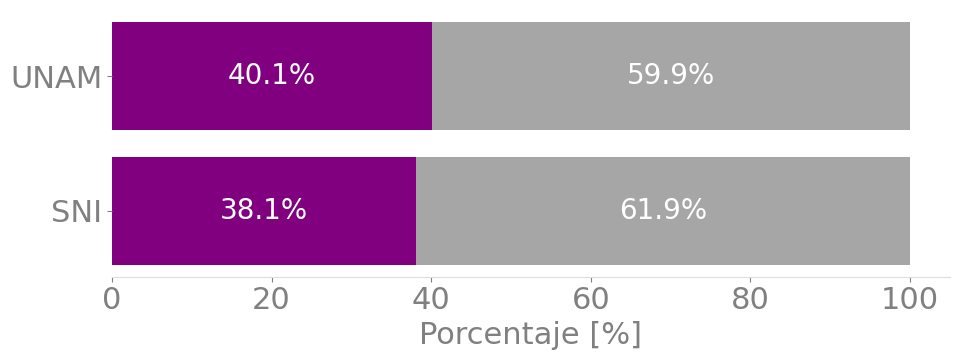

In [ ]:
# Intentaremos generar la gráfica nuevamente con los valores porcentuales correctos

# Crear la gráfica de barras horizontales apiladas con la corrección
fig, ax = plt.subplots(figsize=(10, 4))  # Ajustamos la altura para acomodar la nueva barra

# Dibujar las barras existentes para el SNI
ax.barh("SNI", porcentajes['F'], color='purple', label='Mujeres en SNI')
ax.barh("SNI", porcentajes['M'], left=porcentajes['F'],label='Hombres en SNI', alpha=0.7)

# Dibujar las barras para la UNAM
porcentaje_mujeres_unam = 40.1
porcentaje_hombres_unam = 100 - porcentaje_mujeres_unam
ax.barh("UNAM", porcentaje_mujeres_unam, color='purple', label='Mujeres en UNAM',)
ax.barh("UNAM", porcentaje_hombres_unam, left=porcentaje_mujeres_unam, 
        label='Hombres en UNAM', alpha=0.7)

ax.set_xlabel('Porcentaje [%]')

# Mostrar los valores de los porcentajes en las barras
ax.text(porcentajes['F']/2, 0, f"{porcentajes['F']:.1f}%", va='center', ha='center', color='white')
ax.text(porcentajes['F'] + porcentajes['M']/2, 0, f"{porcentajes['M']:.1f}%", va='center', ha='center', color='white')
ax.text(porcentaje_mujeres_unam/2, 1, f"{porcentaje_mujeres_unam:.1f}%", va='center', ha='center', color='white')
ax.text(porcentaje_mujeres_unam + porcentaje_hombres_unam/2, 1, f"{porcentaje_hombres_unam:.1f}%", va='center', ha='center', color='white')

# Ajustes de estilo
ax.spines['bottom'].set_color('#DDDDDD')


# Mostrar la gráfica
plt.tight_layout()  # Ajusta la disposición para que todo quepa sin superponerse
fig.savefig('images/sni.png')

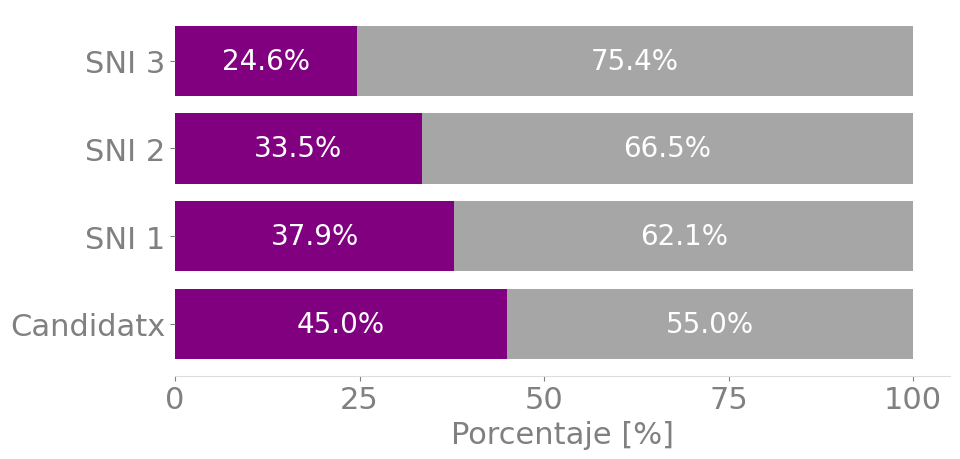

In [ ]:
# Corregimos el mapeo de categorías usando los valores disponibles
categoria_map_correcto = {
    1: 'SNI 1', 
    2: 'SNI 2', 
    3: 'SNI 3', 
    'C': 'Candidatx'
}

# Aplicamos el mapeo correcto
sni['CATEGORÍA_MAPEADA'] = sni['CATEGORÍA'].replace(categoria_map_correcto)

# Calculamos los conteos y porcentajes por categoría
categoria_porcentajes = sni.groupby(['CATEGORÍA_MAPEADA', 'genero']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)

# Aseguramos el orden de las categorías para el gráfico
categoria_porcentajes = categoria_porcentajes.reindex(['Candidatx', 'SNI 1', 'SNI 2', 'SNI 3'])

# Crear la gráfica de barras horizontales apiladas con los colores y título normal
fig, ax = plt.subplots(figsize=(10, 5))

# # Dibujar las barras por categoría
# for categoria in categoria_porcentajes.index:
#     ax.barh(categoria, categoria_porcentajes.loc[categoria, 'F'], color='purple')
#     ax.barh(categoria, categoria_porcentajes.loc[categoria, 'M'], left=categoria_porcentajes.loc[categoria, 'F'], color='skyblue')

# Dibujar las barras por categoría y agregar los valores dentro de las barras
for categoria in categoria_porcentajes.index:
    mujeres_value = categoria_porcentajes.loc[categoria, 'F']
    hombres_value = categoria_porcentajes.loc[categoria, 'M']
    ax.barh(categoria, mujeres_value, color='purple')
    ax.barh(categoria, hombres_value, left=mujeres_value, alpha=0.7)
    ax.text(mujeres_value/2, categoria, f"{mujeres_value:.1f}%", va='center', ha='center', color='white')
    ax.text(mujeres_value + hombres_value/2, categoria, f"{hombres_value:.1f}%", va='center', ha='center', color='white')



ax.set_xlabel('Porcentaje [%]')
ax.set_xticks(range(0, 101, 25))  # Establece las marcas del eje x de 0 a 100, de 25 en 25


# Ajustes de estilo
ax.spines['bottom'].set_color('#DDDDDD')

# Ajustar la disposición
plt.tight_layout()

fig.savefig('images/sni_niveles.png')